In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.lib.modules as modules
import warnings

# Defining specific parameters for the plots
warnings.filterwarnings("ignore")
%matplotlib inline
np.set_printoptions(precision=5)
pd.set_option("display.precision", 5,
              'display.max_rows', None,
              'display.max_columns', None,
              'display.width', None,
              'display.max_colwidth', None)
# change the colors
# plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')

# -----------------------------------------------------
# NOTE: Defining the columns that we are interested in
x = 'Oscillation strain'
y = ['Storage modulus', 'Loss modulus', 'Tan(delta)']  # should be a list
rename_x = x
# -----------------------------------------------------

try:
    assert isinstance(rename_x, str)
except NameError:
    print(f'The rename_x is not defined, setting as "{x}"\n')
    rename_x = x

interested_in = y + [x]
snsc = modules.get_color_palette(y)
sns.set_palette(snsc)
# Opening the files
dfs, files, common_name = modules.load_files_df(interested_in=interested_in)
# Merging the dfs and making the values absolute
df_merged = modules.merge_dfs(dfs, files)

Found Files:
1 - "pc20m2 strain sweep (2)-2.xls"
2 - "pc20m2 strain sweep (3)-2.xls"
3 - "pc20m2 strain sweep (1)-2.xls"

Files related to -> pc20m2


# Looking at the raw data

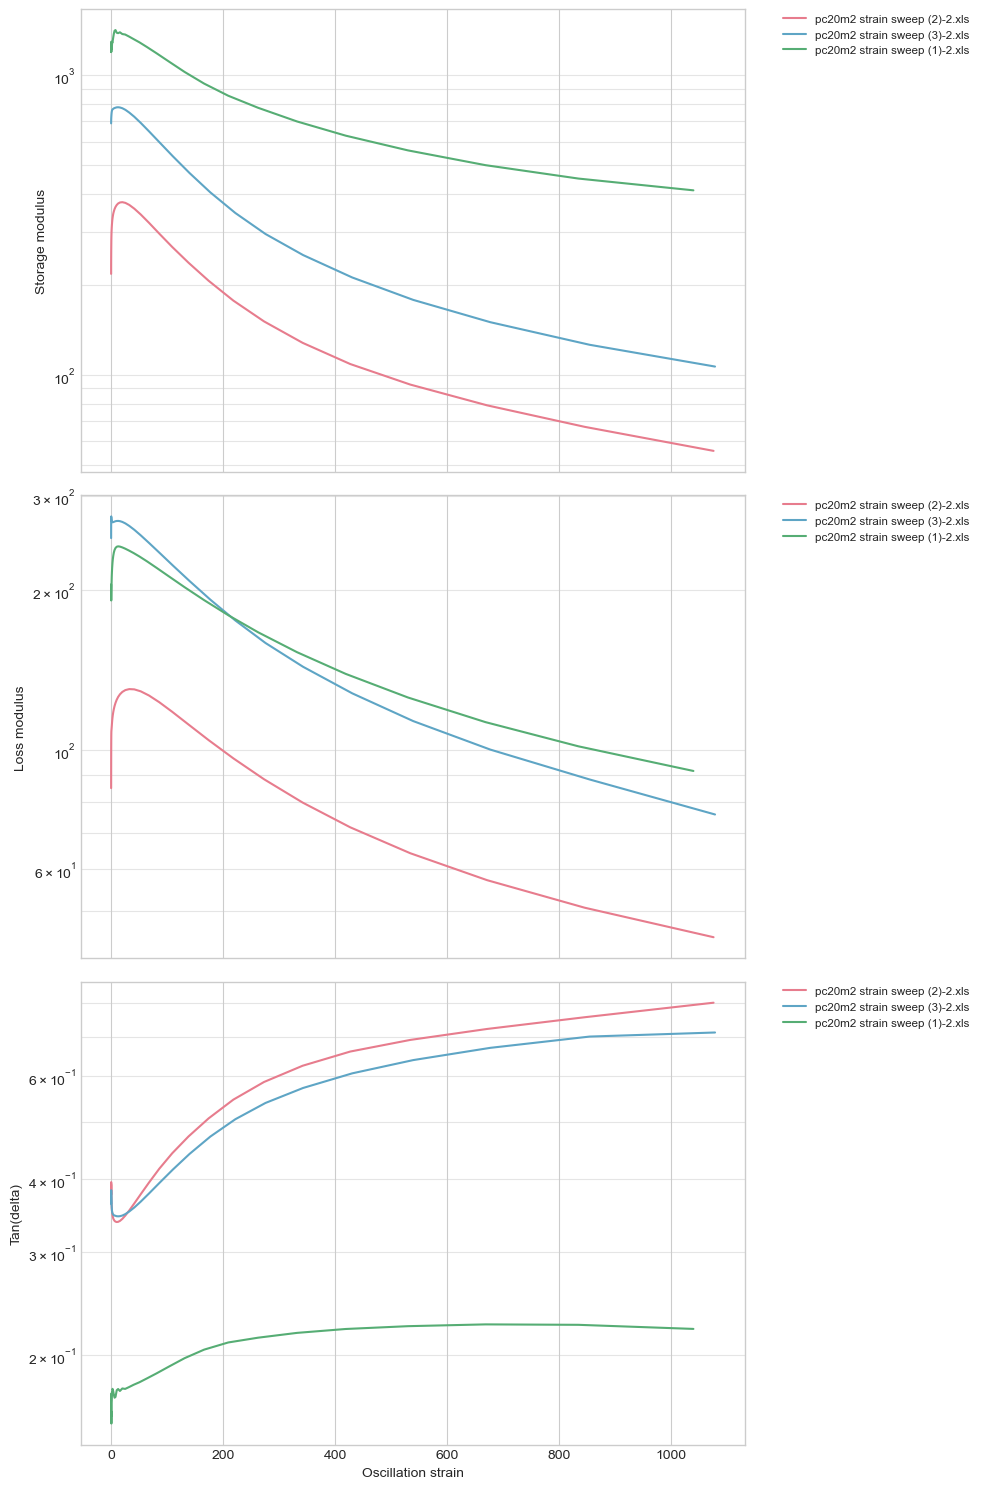

In [2]:
modules.plot_xy(data=df_merged, x=x, y=y,
                log=True,
                sep_plots=True,
                legend=True,
                save_str=f"raw_{common_name}.png"
                )

# Calculating the average values
Just averaging out the data will account for the random uncertainty in the measurements, but not the systematic uncertainty. To account for the systematic uncertainty, we need to calculate the standard deviation of the data and use it to calculate the standard error.

Using fixed bins
Number of bins = 29


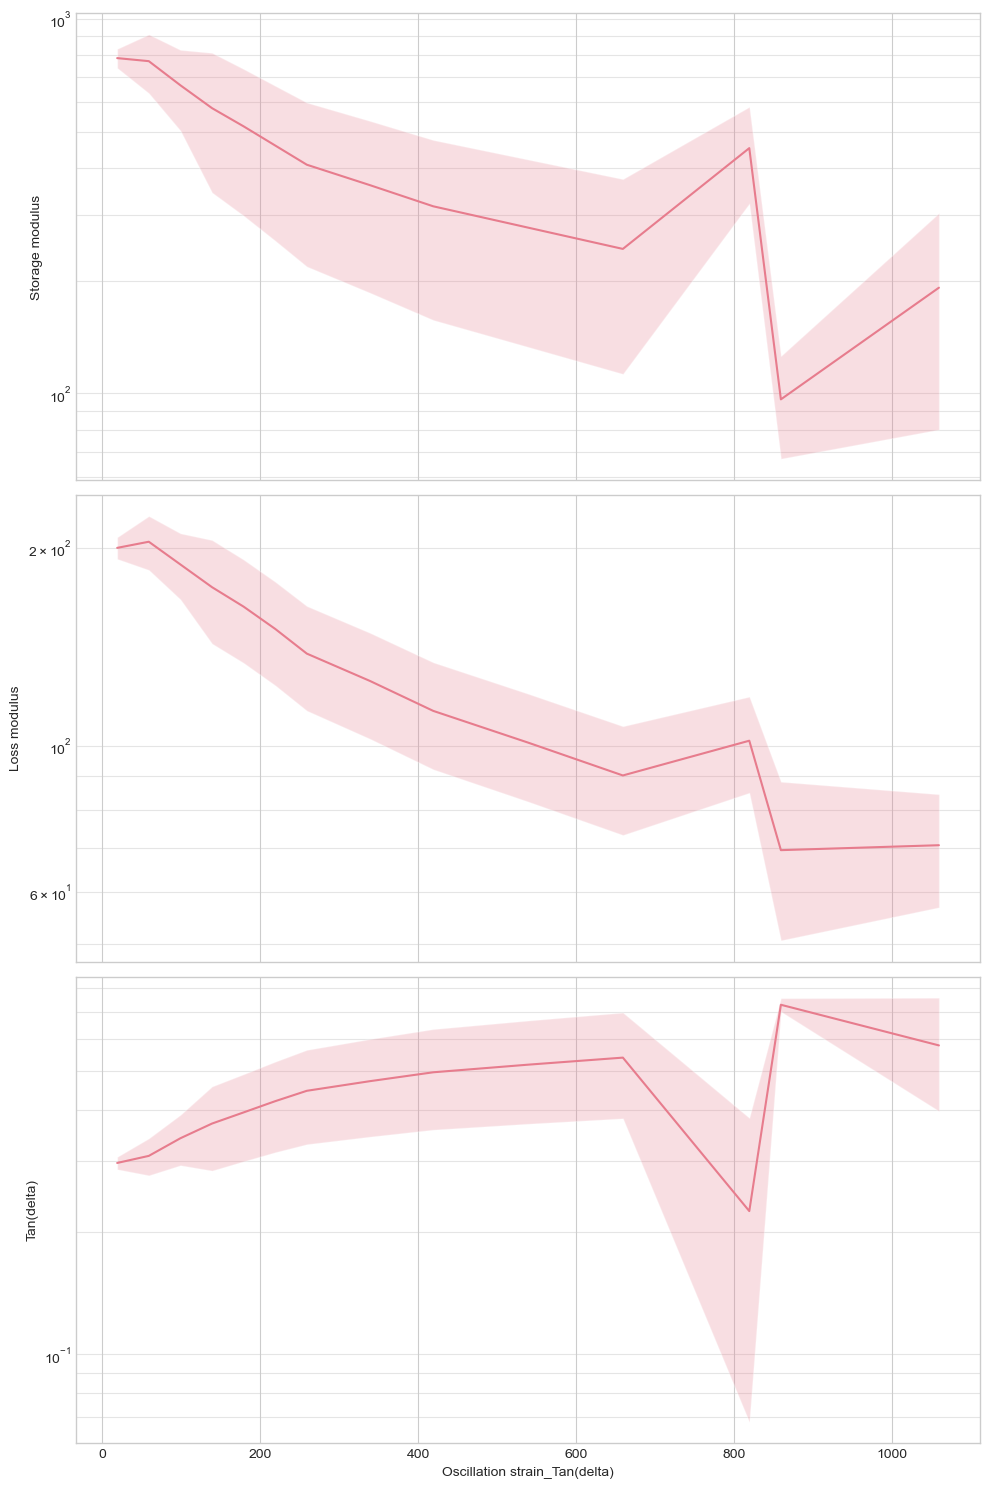

In [7]:
# lower numbers means more noise
step = 40

bins = modules.create_bins(data=df_merged, x=x, step=step, ratios=None)
final_df = modules.av_stderr(df=df_merged, bins=bins, x=x, y=y,
                             rename_x=rename_x,
                             save_str=f"average_{common_name}__{step}_steps_averaging.xlsx"
                             )

# temporary looking at the result to see if everything is ok
modules.plot_xy(data=final_df, x=rename_x, y=y,
                error=True,
                sep_plots=True,
                log=True,
                save_str=f"average_{common_name}__{step}_steps_averaging.png"
                )
